In [89]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
data_df = pd.read_csv("NSEI.csv")

In [91]:
data_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
1,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
3,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
4,2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,4932.200195,0.0


## Data Overview

**Data** - Date of the price
**Open** - Opening Price of the NIFTY
**High** - Highest price of the NIFTY on that particular date
**Low** - Lowest price of the NIFTY on that particualr date
**Volume** - Amount of units sold and bought on that day

In [92]:
data_df.shape

(4118, 7)

In [93]:
# Calculate the number of rows where 'Volume' is 0
num_rows_with_zero_volume = (data_df['Volume'] == 0).sum()

# Display the result
print("\nNumber of rows with 'Volume' = 0:")
print(num_rows_with_zero_volume)


Number of rows with 'Volume' = 0:
1330


In [94]:
data_df = data_df.drop(columns=['Adj Close'])
data_df.head()

,Date,Open,High,Low,Close,Volume
0,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.0
1,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0
2,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0
3,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0
4,2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,0.0


In [95]:
data_df.shape

(4118, 6)

In [96]:
# Convert 'Date' column to datetime
data_df['Date'] = pd.to_datetime(data_df['Date'])

# Display the original DataFrame
print("Original DataFrame:")
print(data_df)

# Define the date range
start_date = '2007-09-18'
end_date = '2013-01-18'

# Remove rows within the date range
data_df = data_df[(data_df['Date'] < start_date) | (data_df['Date'] > end_date)]

Original DataFrame:
           Date          Open          High           Low         Close  \
0    2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
1    2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
2    2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
3    2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
4    2007-09-24   4837.149902   4941.149902   4837.149902   4932.200195   
...         ...           ...           ...           ...           ...   
4113 2024-05-21  22404.550781  22591.099609  22404.550781  22529.050781   
4114 2024-05-22  22576.599609  22629.500000  22483.150391  22597.800781   
4115 2024-05-23  22614.099609  22993.599609  22577.449219  22967.650391   
4116 2024-05-24  22930.750000  23026.400391  22908.000000  22957.099609   
4117 2024-05-27  23038.949219  23110.800781  22871.199219  22932.449219   

        Volume  
0          0.0  
1          0.0  
2          0.0  
3          

In [97]:
data_df.head()

,Date,Open,High,Low,Close,Volume
1320,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,130900.0
1321,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,129000.0
1322,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,137000.0
1323,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,185200.0
1324,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,147600.0


In [98]:
data_df.shape

(2798, 6)

In [99]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2798 entries, 1320 to 4117
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2798 non-null   datetime64[ns]
 1   Open    2784 non-null   float64       
 2   High    2784 non-null   float64       
 3   Low     2784 non-null   float64       
 4   Close   2784 non-null   float64       
 5   Volume  2784 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 153.0 KB


In [100]:
data_df = data_df.dropna()

In [101]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2784 entries, 1320 to 4117
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2784 non-null   datetime64[ns]
 1   Open    2784 non-null   float64       
 2   High    2784 non-null   float64       
 3   Low     2784 non-null   float64       
 4   Close   2784 non-null   float64       
 5   Volume  2784 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 152.2 KB


In [102]:
data_df.head()

,Date,Open,High,Low,Close,Volume
1320,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,130900.0
1321,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,129000.0
1322,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,137000.0
1323,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,185200.0
1324,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,147600.0


<Axes: >

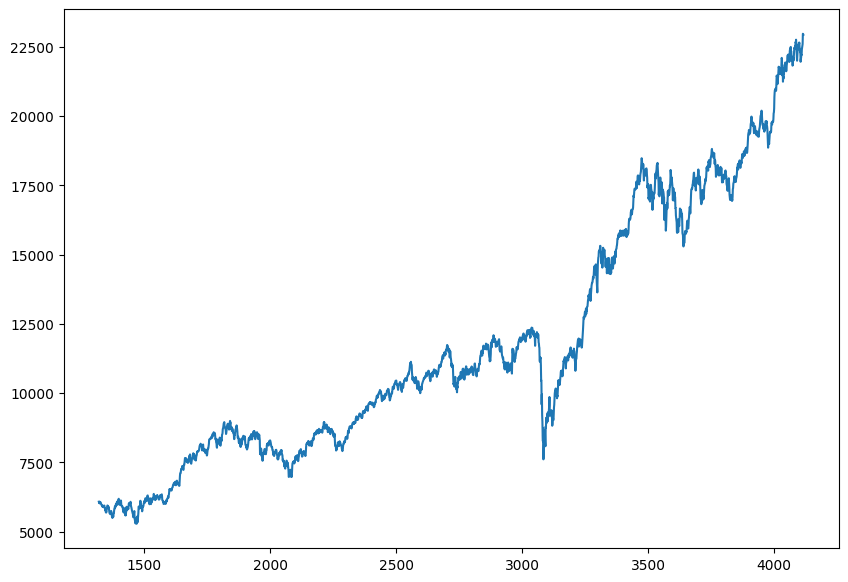

In [103]:
#plot close price
data_df['Close'].plot(figsize=(10,7))

In [104]:
series_shifted= data_df['Close'].shift()
data_2 = data_df
data_2.head()

,Date,Open,High,Low,Close,Volume
1320,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,130900.0
1321,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,129000.0
1322,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,137000.0
1323,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,185200.0
1324,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,147600.0


In [105]:
data_2['prev_close'] = series_shifted
data_2.head()

,Date,Open,High,Low,Close,Volume,prev_close
1320,2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,130900.0,NaN
1321,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,129000.0,6082.299805
1322,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,137000.0,6048.500000
1323,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,185200.0,6054.299805
1324,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,147600.0,6019.350098


In [106]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2784 entries, 1320 to 4117
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2784 non-null   datetime64[ns]
 1   Open        2784 non-null   float64       
 2   High        2784 non-null   float64       
 3   Low         2784 non-null   float64       
 4   Close       2784 non-null   float64       
 5   Volume      2784 non-null   float64       
 6   prev_close  2783 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 174.0 KB


In [107]:
data_df=data_2.dropna()

In [108]:
data_df.head()

,Date,Open,High,Low,Close,Volume,prev_close
1321,2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,129000.0,6082.299805
1322,2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,137000.0,6048.500000
1323,2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,185200.0,6054.299805
1324,2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,147600.0,6019.350098
1325,2013-01-28,6082.100098,6088.399902,6061.399902,6074.799805,113100.0,6074.649902


In [109]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2783 entries, 1321 to 4117
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2783 non-null   datetime64[ns]
 1   Open        2783 non-null   float64       
 2   High        2783 non-null   float64       
 3   Low         2783 non-null   float64       
 4   Close       2783 non-null   float64       
 5   Volume      2783 non-null   float64       
 6   prev_close  2783 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 173.9 KB


In [110]:
x= data_df[['Open','prev_close','Volume','High','Low']]
y= data_df['Close']

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [112]:
print(x_train.shape , x_test.shape)

(2087, 5) (696, 5)


In [113]:
##linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit (x_train, y_train)

LinearRegression()

In [114]:
predicted= regressor.predict(x_test)
print(x_test)

              Open    prev_close    Volume          High           Low
3169  11225.000000  11194.150391  588100.0  11225.000000  11087.849609
1894   8432.500000   8421.000000  187300.0   8489.549805   8420.599609
1425   5638.049805   5667.649902  193500.0   5640.000000   5566.250000
2859  11727.049805  11752.799805  260400.0  11727.049805  11583.950195
1620   6741.850098   6736.100098  155100.0   6741.850098   6685.149902
...            ...           ...       ...           ...           ...
3847  17653.349609  17660.150391  281500.0  17666.150391  17579.849609
3887  18774.449219  18755.900391  263000.0  18794.099609  18669.050781
2105   7651.100098   7597.000000  232600.0   7741.950195   7643.450195
2057   7420.350098   7437.799805  233600.0   7463.649902   7336.399902
2227   8748.900391   8723.049805  151400.0   8768.500000   8690.500000

[696 rows x 5 columns]


In [115]:
predicted.shape

(696,)

In [116]:
_df= pd.DataFrame({"Actual": y_test, "Predicted": predicted})
print(_df)

            Actual     Predicted
3169  11131.799805  11119.730193
1894   8458.950195   8474.731481
1425   5590.250000   5578.427458
2859  11594.450195  11611.161139
1620   6694.350098   6695.141591
...            ...           ...
3847  17618.750000  17607.074223
3887  18688.099609  18711.373285
2105   7735.200195   7731.201707
2057   7351.000000   7390.735894
2227   8706.400391   8720.862331

[696 rows x 2 columns]


In [117]:
regressor.score(x_test,y_test)

0.9999400950551383

In [118]:
import math
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error 23.78839504956648
Mean Square Error 1263.75235451928
Root Mean Error 35.549294711981


In [119]:
data_predicted = regressor.predict(x)
print(data_predicted)

[ 6065.52947966  6041.18121255  6030.53068792 ... 22938.11503833
 22999.59920394 22979.15966154]


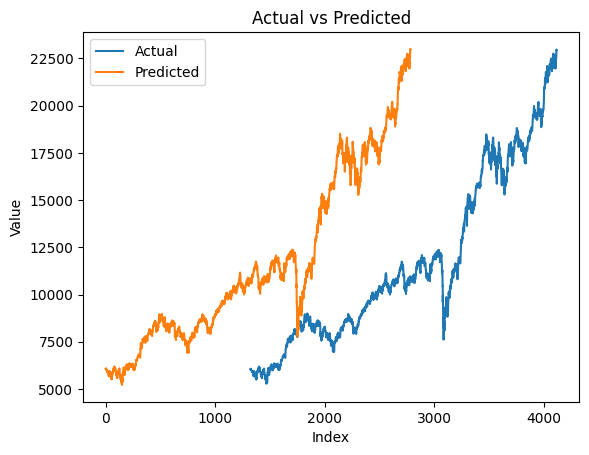

In [121]:
#plot the graph

plt.plot(y,label='Actual')
plt.plot(data_predicted, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()